We apply the KNN approach to the Caravan data set. This data set includes 85 predictors that measure 
demographic characteristics for 5,822 individuals. The response variable is 
**Purchase**, which indicates whether or not a given individual purchases a 
caravan insurance policy. In this data set, only 6 % of people purchased 
caravan insurance.

In [ ]:
import pandas as pd
caravan = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Caravan.csv')

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay, classification_report, mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# from yellowbrick.classifier import ROCAUC

In [ ]:
caravan = caravan.drop(columns = 'Unnamed: 0')
caravan

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,No
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,Yes
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No


In [ ]:
caravan.shape

(5822, 86)

In [ ]:
caravan.rename(columns = lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
caravan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   mostype   5822 non-null   int64 
 1   maanthui  5822 non-null   int64 
 2   mgemomv   5822 non-null   int64 
 3   mgemleef  5822 non-null   int64 
 4   moshoofd  5822 non-null   int64 
 5   mgodrk    5822 non-null   int64 
 6   mgodpr    5822 non-null   int64 
 7   mgodov    5822 non-null   int64 
 8   mgodge    5822 non-null   int64 
 9   mrelge    5822 non-null   int64 
 10  mrelsa    5822 non-null   int64 
 11  mrelov    5822 non-null   int64 
 12  mfalleen  5822 non-null   int64 
 13  mfgekind  5822 non-null   int64 
 14  mfwekind  5822 non-null   int64 
 15  moplhoog  5822 non-null   int64 
 16  moplmidd  5822 non-null   int64 
 17  mopllaag  5822 non-null   int64 
 18  mberhoog  5822 non-null   int64 
 19  mberzelf  5822 non-null   int64 
 20  mberboer  5822 non-null   int64 
 21  mbermidd  5822

In [ ]:
caravan.purchase.value_counts()

No     5474
Yes     348
Name: purchase, dtype: int64

In [ ]:
round(caravan.purchase.value_counts()[1]/ sum(caravan.purchase.value_counts())* 100, 4)

5.9773

In [ ]:
y = caravan.purchase
X = caravan.drop(columns = 'purchase')

X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.75, random_state=42, stratify = y 
    )

In [ ]:
knnclf = KNeighborsClassifier()

In [ ]:
k = np.arange(1, 31)
k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [ ]:
parameters= [{'n_neighbors': k} ]
Grid = GridSearchCV(knnclf, parameters, cv = 5 )
Grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])}])

In [ ]:
bestk_model = Grid.best_estimator_
bestk_model

KNeighborsClassifier(n_neighbors=4)

In [ ]:
out = Grid.cv_results_
out = pd.DataFrame(out)
out.iloc[:, 4:].sort_values(by = "rank_test_score")

,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,4,{'n_neighbors': 4},0.941581,0.941581,0.941581,0.941581,0.938144,0.940893,0.001375,1
14,15,{'n_neighbors': 15},0.941581,0.941581,0.941581,0.938144,0.938144,0.940206,0.001683,2
27,28,{'n_neighbors': 28},0.941581,0.941581,0.941581,0.938144,0.938144,0.940206,0.001683,2
26,27,{'n_neighbors': 27},0.941581,0.941581,0.941581,0.938144,0.938144,0.940206,0.001683,2
25,26,{'n_neighbors': 26},0.941581,0.941581,0.941581,0.938144,0.938144,0.940206,0.001683,2
24,25,{'n_neighbors': 25},0.941581,0.941581,0.941581,0.938144,0.938144,0.940206,0.001683,2
23,24,{'n_neighbors': 24},0.941581,0.941581,0.941581,0.938144,0.938144,0.940206,0.001683,2
22,23,{'n_neighbors': 23},0.941581,0.941581,0.941581,0.938144,0.938144,0.940206,0.001683,2
21,22,{'n_neighbors': 22},0.941581,0.941581,0.941581,0.938144,0.938144,0.940206,0.001683,2
20,21,{'n_neighbors': 21},0.941581,0.941581,0.941581,0.938144,0.938144,0.940206,0.001683,2


In [ ]:
k = 4
knnclf2 = KNeighborsClassifier(n_neighbors = 4)

In [ ]:
# Fit the classifier
knnclf2.fit(X_train, y_train)

# Evaluate the outcome on the train set using R^2
r2_train = knnclf2.score(X_train, y_train)

# Print results
print(f'kNN model with {k} neighbors gives R^2 on the train set: {r2_train:.5}')

kNN model with 4 neighbors gives R^2 on the train set: 0.94364


In [ ]:
# Evaluate the outcome on the test set using R^2
r2_test = knnclf2.score(X_test, y_test)

# Print results
print(f'kNN model with {k} neighbors gives R^2 on the test set: {r2_test:.5}')

kNN model with 4 neighbors gives R^2 on the test set: 0.93955


In [ ]:
y_pred = knnclf2.predict(X_test)
accuracy_score(y_pred, y_test)

0.9395465994962217

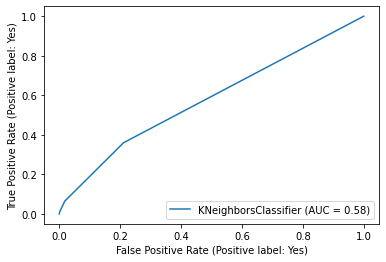

In [ ]:
RocCurveDisplay.from_estimator(knnclf2, X_test, y_test)

Text(0.5, 1.0, 'Confusion matrix')

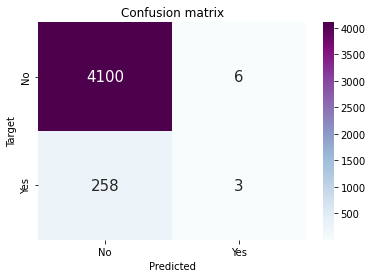

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, xticklabels=['No', 'Yes'], 
            yticklabels=[ 'No','Yes'], fmt='g',cmap='BuPu', annot_kws={"fontsize":15})
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')

In [ ]:
 # Look at classification report to evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97      4106
         Yes       0.33      0.01      0.02       261

    accuracy                           0.94      4367
   macro avg       0.64      0.51      0.50      4367
weighted avg       0.90      0.94      0.91      4367



Given the above classification report and confusion matrix, we need to use another accuracy metric for our performance metrics because the model performed badly in predicting those who will not buy the insurance product.